In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset (replace 'transactions.csv' with your actual file path)
df = pd.read_csv("E:/Unified_Mentor_Internship_Project/Daily Transactions/Daily Household Transactions.csv")

In [3]:
df.shape

(2461, 8)

In [4]:
df.head(5)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [5]:
df.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [7]:
df.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [8]:
#Data Cleaning
def parse_mixed_datetime(val):
    try:
        return pd.to_datetime(val, format='%d/%m/%Y %H:%M:%S')
    except:
        try:
            return pd.to_datetime(val, format='%d/%m/%Y')
        except:
            return pd.NaT

df['Date'] = df['Date'].astype(str).str.strip().apply(parse_mixed_datetime)


In [9]:
df['Subcategory'] = df['Subcategory'].fillna('Unknown')

In [10]:
df['Note'] = df['Note'].fillna('No Description')

In [11]:
df.isnull().sum()

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64

In [12]:
#Feature Engineering
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name()
df['MonthName'] = df['Date'].dt.month_name()

In [13]:
total_income = df[df['Income/Expense'] == 'Income']['Amount'].sum()
total_expenses = df[df['Income/Expense'] == 'Expense']['Amount'].sum()
net_worth_change = total_income - total_expenses
print(net_worth_change )

1085006.8199999996


In [14]:
#EDA
# Income vs Expense summary
print("\nIncome vs Expense Summary:")
income_expense_summary = df.groupby('Income/Expense')['Amount'].agg(['count', 'sum', 'mean', 'median'])
print(income_expense_summary)


Income vs Expense Summary:
                count         sum          mean  median
Income/Expense                                         
Expense          2176  1957390.53    899.536089    83.0
Income            125  3042397.35  24339.178800  2000.0
Transfer-Out      160  1770780.90  11067.380625  1000.0


In [15]:
# Category-wise analysis
print("\nCategory-wise Transaction Summary:")
category_summary = df.groupby(['Category', 'Income/Expense'])['Amount'].agg(['count', 'sum', 'mean']).round(2)
print(category_summary)


Category-wise Transaction Summary:
                                          count         sum       mean
Category                  Income/Expense                              
Amazon pay cashback       Income              2       23.00      11.50
Apparel                   Expense            47    25373.82     539.87
Beauty                    Expense            22     4189.00     190.41
Bonus                     Income              6     3026.00     504.33
Cook                      Expense             4    12443.00    3110.75
Culture                   Expense            11     4304.36     391.31
Dividend earned on Shares Income             12      876.75      73.06
Documents                 Expense             2      100.00      50.00
Education                 Expense            18      537.00      29.83
Equity Mutual Fund A      Transfer-Out       14    63000.00    4500.00
Equity Mutual Fund B      Transfer-Out        1   100000.00  100000.00
Equity Mutual Fund C      Transfer-Out   

In [16]:
# Payment mode analysis
print("\nPayment Mode Analysis:")
mode_summary = df.groupby('Mode')['Amount'].agg(['count', 'sum', 'mean']).round(2)
print(mode_summary)


Payment Mode Analysis:
                       count         sum       mean
Mode                                               
Cash                    1046   176252.00     168.50
Credit Card              162   205254.01    1267.00
Debit Card                 2      942.36     471.18
Equity Mutual Fund A       1   113376.00  113376.00
Equity Mutual Fund B      11    22000.00    2000.00
Equity Mutual Fund C       1     6049.00    6049.00
Equity Mutual Fund D       1   106875.00  106875.00
Fixed Deposit              1   150000.00  150000.00
Recurring Deposit          3    94738.00   31579.33
Saving Bank account 1   1223  5791530.99    4735.51
Saving Bank account 2      5      752.85     150.57
Share Market Trading       5   102798.57   20559.71


In [17]:
# Monthly financial summary
print("Monthly Financial Summary:")
monthly_summary = df.groupby(['Year', 'Month', 'Income/Expense'])['Amount'].sum().unstack(fill_value=0)
monthly_summary['Net_Amount'] = monthly_summary.get('Income', 0) - monthly_summary.get('Expense', 0)
monthly_summary['Savings_Rate'] = (monthly_summary['Net_Amount'] / monthly_summary.get('Income', 1) * 100).round(2)
print(monthly_summary)

Monthly Financial Summary:
Income/Expense    Expense     Income  Transfer-Out  Net_Amount  Savings_Rate
Year Month                                                                  
2015 1           33870.00       0.00          0.00   -33870.00          -inf
     2           24308.00   49806.00          0.00    25498.00         51.19
     3           32631.40   70806.00          0.00    38174.60         53.91
     4           24222.00   49306.00          0.00    25084.00         50.87
     5           63118.00   47859.00          0.00   -15259.00        -31.88
     6           19567.00   47859.00          0.00    28292.00         59.12
     7           31735.00   47859.00          0.00    16124.00         33.69
     8           43340.00   49806.00          0.00     6466.00         12.98
     9           18577.00   54606.00          0.00    36029.00         65.98
     10          32217.00   49806.00          0.00    17589.00         35.32
     11          26459.00   51306.00          0.0

In [18]:
# Top expense categories
print("\nTop 10 Expense Categories:")
expense_categories = df[df['Income/Expense'] == 'Expense'].groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)
print(expense_categories)


Top 10 Expense Categories:
Category
Money transfer           606528.90
Investment               271858.00
Transportation           169053.78
Household                161645.58
subscription             114587.91
Food                      96403.10
Public Provident Fund     90000.00
Other                     87025.28
Family                    78582.20
Health                    66252.75
Name: Amount, dtype: float64


In [19]:
# Average transaction amount by day of week
print("\nAverage Transaction Amount by Day of Week:")
daily_avg = df.groupby(['DayOfWeek', 'Income/Expense'])['Amount'].mean().unstack(fill_value=0).round(2)
print(daily_avg)


Average Transaction Amount by Day of Week:
Income/Expense  Expense    Income  Transfer-Out
DayOfWeek                                      
Friday           888.92  18577.11       7397.94
Monday           757.34  10555.82       3849.46
Saturday         670.32  27217.26       5101.32
Sunday           935.75  21908.94       3343.75
Thursday        1000.64  32221.25       7873.65
Tuesday         1157.32  23122.17      26787.34
Wednesday        905.90  31488.39      11502.28


In [20]:
 # Payment mode preferences by transaction type
print("\nPayment Mode Preferences:")
mode_preferences = pd.crosstab(df['Mode'], df['Income/Expense'], normalize='columns') * 100
print(mode_preferences.round(2))


Payment Mode Preferences:
Income/Expense         Expense  Income  Transfer-Out
Mode                                                
Cash                     47.75     5.6          0.00
Credit Card               7.44     0.0          0.00
Debit Card                0.09     0.0          0.00
Equity Mutual Fund A      0.00     0.8          0.00
Equity Mutual Fund B      0.00     0.0          6.88
Equity Mutual Fund C      0.00     0.8          0.00
Equity Mutual Fund D      0.00     0.8          0.00
Fixed Deposit             0.00     0.0          0.62
Recurring Deposit         0.00     2.4          0.00
Saving Bank account 1    44.62    87.2         89.38
Saving Bank account 2     0.09     2.4          0.00
Share Market Trading      0.00     0.0          3.12


Text(0.5, 1.0, 'Income vs Expense Distribution')

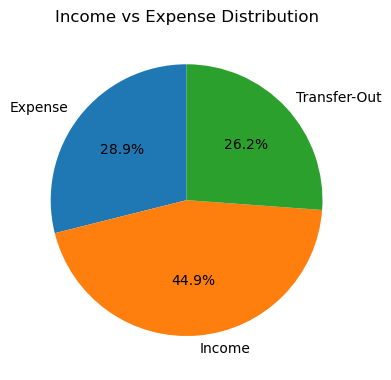

In [21]:
#DATA VISUALIZATION
# Income vs Expense Pie Chart
fig = plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
income_expense_total = df.groupby('Income/Expense')['Amount'].sum()
plt.pie(income_expense_total.values, labels=income_expense_total.index, autopct='%1.1f%%', startangle=90)
plt.title('Income vs Expense Distribution')

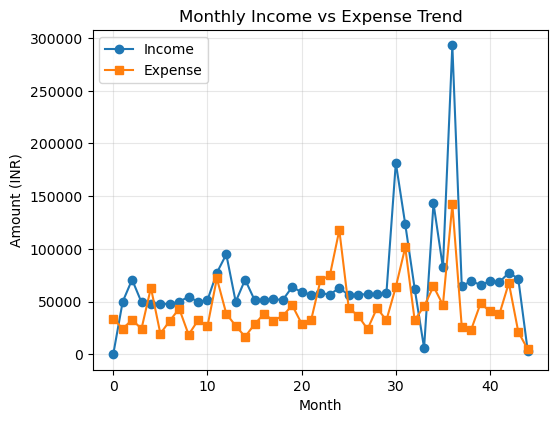

In [23]:
# 2. Monthly Trend
# Group income and expense by Year and Month
income = df[df['Income/Expense'] == 'Income'].groupby(['Year', 'Month'])['Amount'].sum()
expense = df[df['Income/Expense'] == 'Expense'].groupby(['Year', 'Month'])['Amount'].sum()

# Combine into a single DataFrame and fill missing values with 0
monthly_trend = pd.DataFrame({'Income': income, 'Expense': expense}).fillna(0)

# Create a numeric x-axis
months = range(len(monthly_trend))

# Plot
fig = plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 2)
plt.plot(months, monthly_trend['Income'].values, label='Income', marker='o')
plt.plot(months, monthly_trend['Expense'].values, label='Expense', marker='s')
plt.title('Monthly Income vs Expense Trend')
plt.xlabel('Month')
plt.ylabel('Amount (INR)')
plt.legend()
plt.grid(True, alpha=0.3)


Text(0.5, 0, 'Amount (INR)')

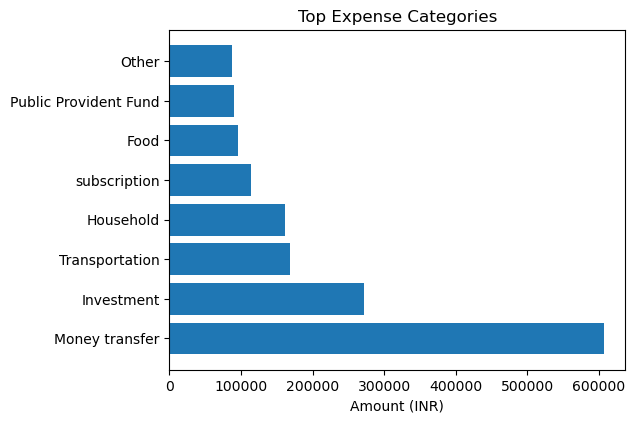

In [24]:
# Top Expense Categories
fig = plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 3)
top_expenses = expense_categories.head(8)
plt.barh(range(len(top_expenses)), top_expenses.values)
plt.yticks(range(len(top_expenses)), top_expenses.index)
plt.title('Top Expense Categories')
plt.xlabel('Amount (INR)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Saving Bank account 1'),
  Text(1, 0, 'Cash'),
  Text(2, 0, 'Credit Card'),
  Text(3, 0, 'Equity Mutual Fund B'),
  Text(4, 0, 'Share Market Trading'),
  Text(5, 0, 'Saving Bank account 2'),
  Text(6, 0, 'Recurring Deposit'),
  Text(7, 0, 'Debit Card'),
  Text(8, 0, 'Equity Mutual Fund C'),
  Text(9, 0, 'Equity Mutual Fund A'),
  Text(10, 0, 'Equity Mutual Fund D'),
  Text(11, 0, 'Fixed Deposit')])

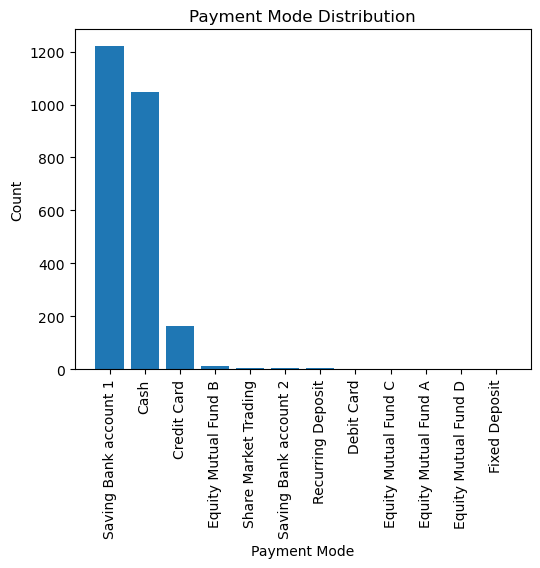

In [25]:
#  Payment Mode Distribution
fig = plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 4)
mode_counts = df['Mode'].value_counts()
plt.bar(mode_counts.index, mode_counts.values)
plt.title('Payment Mode Distribution')
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.xticks(rotation=90)

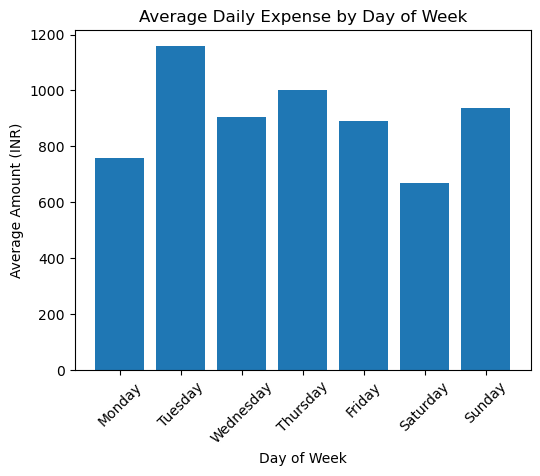

In [26]:
 #  Daily Average Spending
fig = plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 5)
if 'Expense' in daily_avg.columns:
    daily_expense = daily_avg['Expense']
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_expense_ordered = daily_expense.reindex(days_order, fill_value=0)
    plt.bar(daily_expense_ordered.index, daily_expense_ordered.values)
    plt.title('Average Daily Expense by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Amount (INR)')
    plt.xticks(rotation=45)

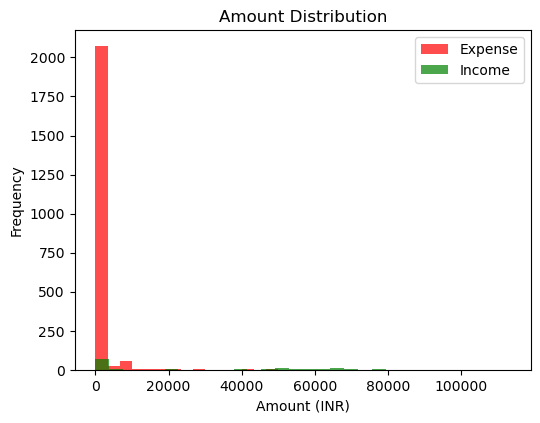

In [27]:
# Amount Distribution
fig = plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 6)
plt.hist(df[df['Income/Expense'] == 'Expense']['Amount'], bins=30, alpha=0.7, label='Expense', color='red')
plt.hist(df[df['Income/Expense'] == 'Income']['Amount'], bins=30, alpha=0.7, label='Income', color='green')
plt.title('Amount Distribution')
plt.xlabel('Amount (INR)')
plt.ylabel('Frequency')
plt.legend()

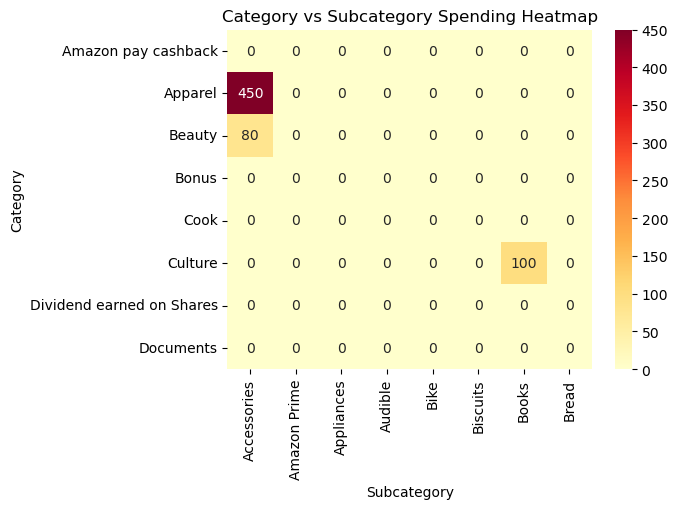

In [28]:
# 7. Category vs Subcategory Heatmap
fig = plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 7)
category_subcategory = df.groupby(['Category', 'Subcategory'])['Amount'].sum().unstack(fill_value=0)
if not category_subcategory.empty:
    sns.heatmap(category_subcategory.iloc[:8, :8], annot=True, fmt='.0f', cmap='YlOrRd')
    plt.title('Category vs Subcategory Spending Heatmap')

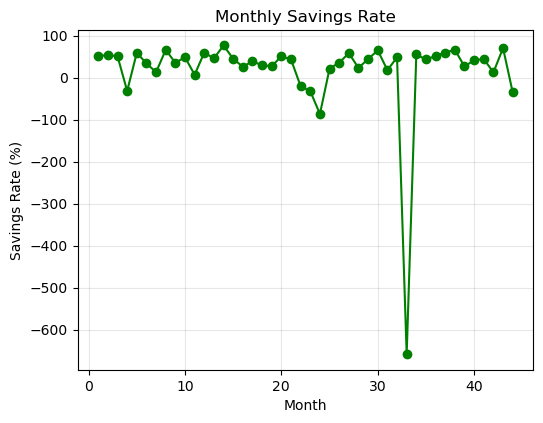

In [29]:
# Monthly Savings Rate
fig = plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 8)
if 'Savings_Rate' in monthly_summary.columns:
        plt.plot(range(len(monthly_summary)), monthly_summary['Savings_Rate'], marker='o', color='green')
        plt.title('Monthly Savings Rate')
        plt.xlabel('Month')
        plt.ylabel('Savings Rate (%)')
        plt.grid(True, alpha=0.3)

Text(0.5, 1.0, 'Transaction Count by Category')

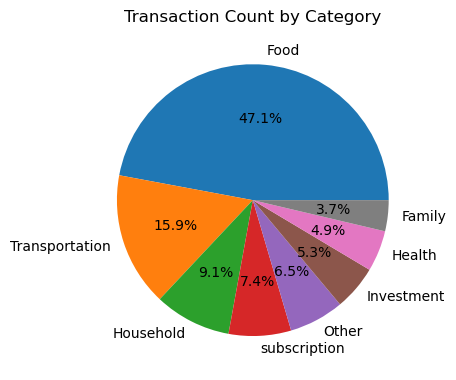

In [30]:
# Transaction Count by Category
fig = plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 9)
category_counts = df['Category'].value_counts().head(8)
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Transaction Count by Category')

In [31]:
total_income = df[df['Income/Expense'] == 'Income']['Amount'].sum()
total_expense = df[df['Income/Expense'] == 'Expense']['Amount'].sum()
net_savings = total_income - total_expense
savings_rate = (net_savings / total_income) * 100 if total_income > 0 else 0

In [32]:
print(f"📊 FINANCIAL OVERVIEW:")
print(f"   • Total Income: ₹{total_income:,.2f}")
print(f"   • Total Expense: ₹{total_expense:,.2f}")
print(f"   • Net Savings: ₹{net_savings:,.2f}")
print(f"   • Savings Rate: {savings_rate:.2f}%")

📊 FINANCIAL OVERVIEW:
   • Total Income: ₹3,042,397.35
   • Total Expense: ₹1,957,390.53
   • Net Savings: ₹1,085,006.82
   • Savings Rate: 35.66%


In [33]:
# Top expense category
top_expense_cat = expense_categories.index[0] if not expense_categories.empty else "N/A"
top_expense_amount = expense_categories.iloc[0] if not expense_categories.empty else 0
print(f"   • Highest expense category: {top_expense_cat} (₹{top_expense_amount:,.2f})")

   • Highest expense category: Money transfer (₹606,528.90)


In [34]:
# Average transaction amounts
avg_income = df[df['Income/Expense'] == 'Income']['Amount'].mean()
avg_expense = df[df['Income/Expense'] == 'Expense']['Amount'].mean()
print(f"   • Average income per transaction: ₹{avg_income:.2f}")
print(f"   • Average expense per transaction: ₹{avg_expense:.2f}")

   • Average income per transaction: ₹24339.18
   • Average expense per transaction: ₹899.54


In [35]:
# Most used payment mode
top_payment_mode = df['Mode'].value_counts().index[0]
print(f"   • Most used payment mode: {top_payment_mode}")

   • Most used payment mode: Saving Bank account 1


In [36]:
if savings_rate < 20:
        print("   • Consider increasing your savings rate. Aim for at least 20% of income.")
else:
        print("   • Great job! Your savings rate is healthy.")

   • Great job! Your savings rate is healthy.
